In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load monthly and yearly datasets
monthly_data = pd.read_csv('monthly_deaths.csv')
yearly_data = pd.read_csv('yearly_deaths_by_clinic.csv')

print(monthly_data.head())
print()
print(monthly_data.info())
print()
print(yearly_data.head())
print()
print(yearly_data.info())

         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     i

In [7]:
monthly_data['date'] = pd.to_datetime(monthly_data['date'])

# Group data by month and calculate monthly mortality rate
monthly_data['month'] = monthly_data['date'].dt.month
monthly_mortality = monthly_data.groupby('month')['deaths'].mean()

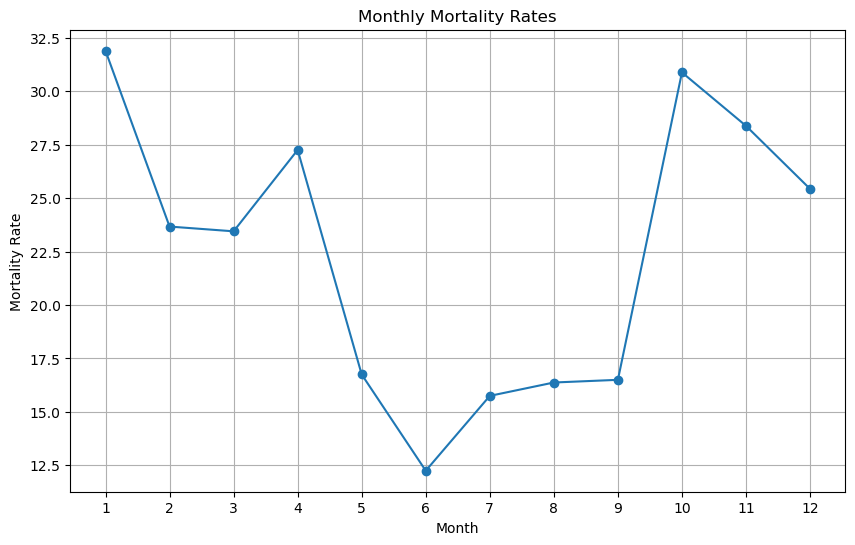

In [5]:
# Plot monthly mortality rates
plt.figure(figsize=(10, 6))
plt.plot(monthly_mortality.index, monthly_mortality.values, marker='o')
plt.title('Monthly Mortality Rates')
plt.xlabel('Month')
plt.ylabel('Mortality Rate')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

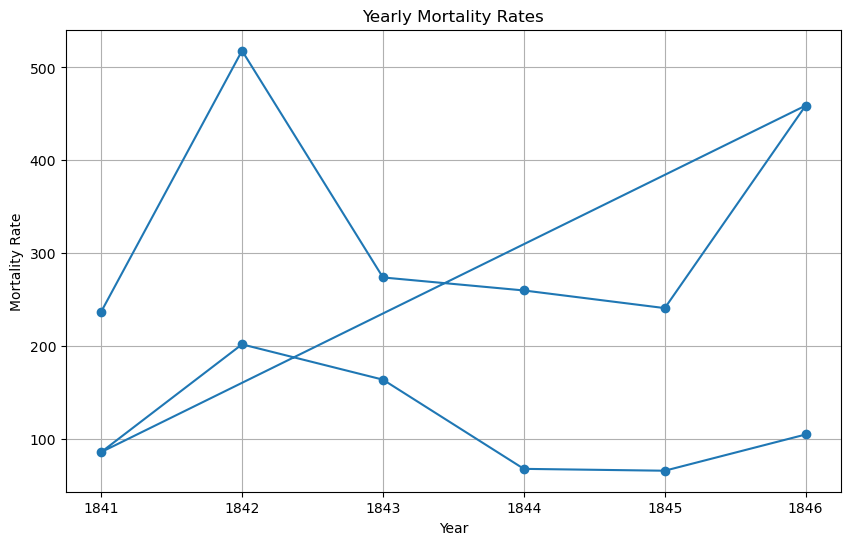

In [6]:
# Plot yearly mortality rates
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['deaths'], marker='o')
plt.title('Yearly Mortality Rates')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()

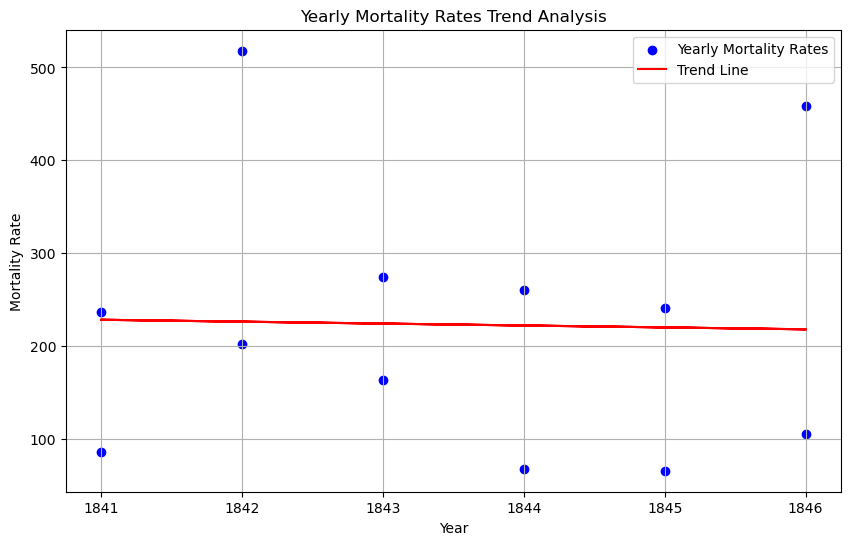

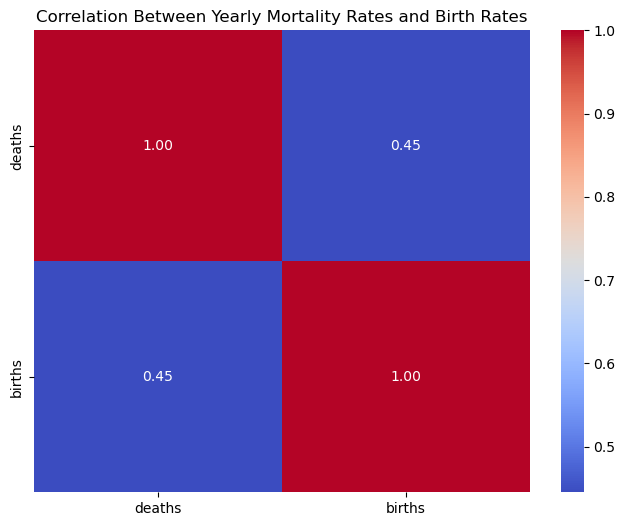

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load yearly data
yearly_data = pd.read_csv('yearly_deaths_by_clinic.csv')

# Trend Analysis: Fit linear regression model
X = yearly_data['year'].values.reshape(-1, 1)
y = yearly_data['deaths'].values

model = LinearRegression()
model.fit(X, y)

# Plot yearly mortality rates and fitted trend line
plt.figure(figsize=(10, 6))
plt.scatter(yearly_data['year'], yearly_data['deaths'], label='Yearly Mortality Rates', color='blue')
plt.plot(X, model.predict(X), color='red', label='Trend Line')
plt.title('Yearly Mortality Rates Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid(True)
plt.show()

# Correlation Analysis: Calculate correlation between yearly mortality rates and birth rates
# Assuming 'births' is a column representing yearly birth rates in yearly_data
correlation_matrix = yearly_data[['deaths', 'births']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Yearly Mortality Rates and Birth Rates')
plt.show()
